In [1]:
# loading packages

import os

import pandas as pd
import numpy as np

# plotting packages
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as clrs

# Importing and initializing the PCA class from scikit learn and then fitting the data to the model.
from sklearn.decomposition import PCA

In [2]:
# load raw data
DATA_FOLDER = './'
raw = pd.read_csv(os.path.join(DATA_FOLDER, 'Country_Risk_2019_data.csv'))

# check the raw data
print("Size of the dataset (row, col): ", raw.shape)
print("\nFirst 5 rows\n", raw.head(n=5))

Size of the dataset (row, col):  (121, 6)

First 5 rows
      Country Abbrev  Corruption  Peace  Legal  GDP Growth
0    Albania     AL          35  1.821  4.546       2.983
1    Algeria     DZ          35  2.219  4.435       2.553
2  Argentina     AR          45  1.989  5.087      -3.061
3    Armenia     AM          42  2.294  4.812       6.000
4  Australia     AU          77  1.419  8.363       1.713


In [3]:
# print summary statistics
print("\nSummary statistics\n", raw.describe())
print("\nCorrelation matrix\n", raw.corr())


Summary statistics
        Corruption       Peace       Legal  GDP Growth
count  121.000000  121.000000  121.000000  121.000000
mean    46.842975    2.001017    5.752529    2.657529
std     18.702499    0.461485    1.373932    2.563741
min     15.000000    1.072000    2.671000   -9.459000
25%     33.000000    1.699000    4.785000    1.249000
50%     41.000000    1.939000    5.455000    2.600000
75%     60.000000    2.294000    6.488000    4.000000
max     87.000000    3.369000    8.712000    7.800000

Correlation matrix
             Corruption     Peace     Legal  GDP Growth
Corruption    1.000000 -0.705002  0.938512   -0.123545
Peace        -0.705002  1.000000 -0.662233   -0.004428
Legal         0.938512 -0.662233  1.000000   -0.150369
GDP Growth   -0.123545 -0.004428 -0.150369    1.000000


C:\Users\gmimo\AppData\Local\Temp\ipykernel_35920\3736554490.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print("\nCorrelation matrix\n", raw.corr())


In [4]:
# normalization
X = raw[['Corruption','Peace', 'Legal', 'GDP Growth']]
X = (X - X.mean()) / X.std()
print(X.head(5))

   Corruption     Peace     Legal  GDP Growth
0   -0.633230 -0.390081 -0.878158    0.126952
1   -0.633230  0.472352 -0.958948   -0.040772
2   -0.098542 -0.026039 -0.484397   -2.230541
3   -0.258948  0.634871 -0.684553    1.303747
4    1.612460 -1.261182  1.900001   -0.368418


In [5]:
# PCA
model = PCA(n_components=4).fit(X)
model

PCA(n_components=4)

In [6]:
# PC matrix
model.components_

array([[-0.60188457,  0.52361257, -0.59403386,  0.10338576],
       [-0.01512074,  0.20084677,  0.02192676, -0.97926051],
       [ 0.32824929,  0.82539386,  0.42519586,  0.17374078],
       [ 0.72784526,  0.06492634, -0.68253313, -0.01320492]])

In [7]:
# Percentage of variation explained by successive eigenvectors/PCS
model.explained_variance_ratio_.round(2)

array([0.64, 0.25, 0.09, 0.01])

<BarContainer object of 4 artists>

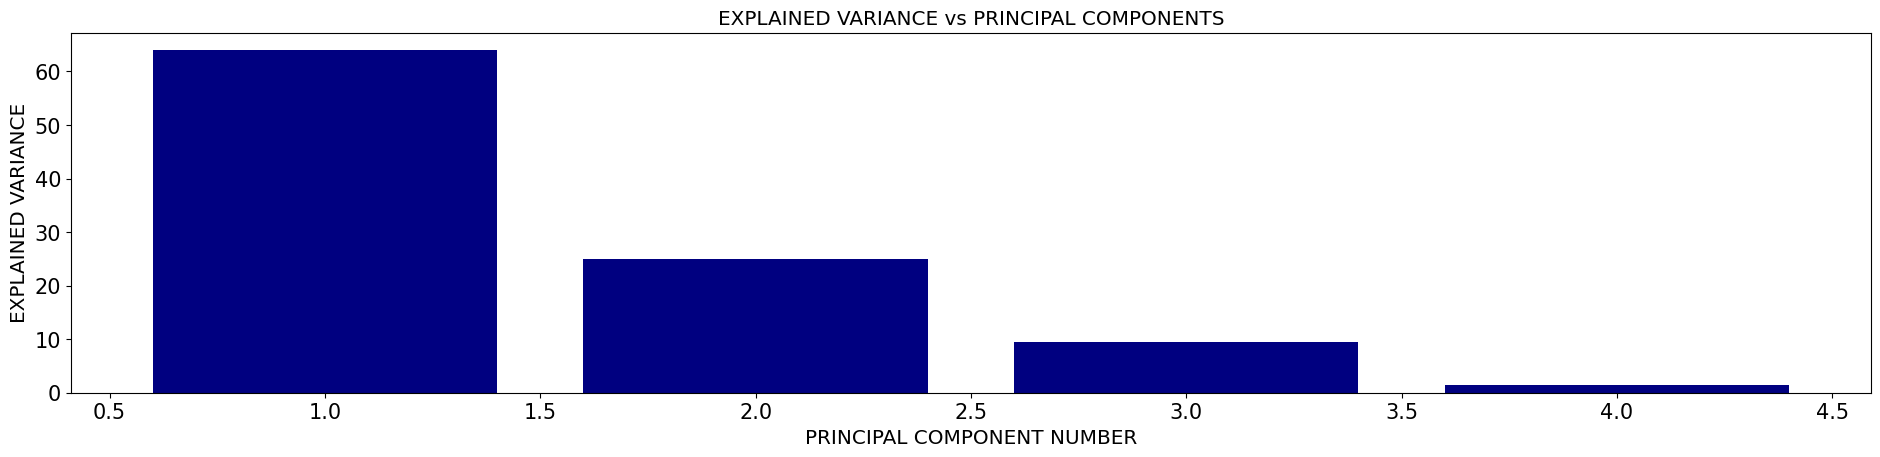

In [8]:
# Plotting the  Percentage of variation explained vs PCs
x_index = np.arange(1, X.shape[1]+1)

fig = plt.figure(figsize=(20,4))

axes = fig.add_axes([0.1,0.1,0.9,0.9])
axes.tick_params(axis='x', labelsize= 15 )
axes.tick_params(axis='y', labelsize= 15 )
axes.set_title('EXPLAINED VARIANCE vs PRINCIPAL COMPONENTS',fontsize='x-large')
axes.set_ylabel('EXPLAINED VARIANCE' ,fontsize='x-large')
axes.set_xlabel('PRINCIPAL COMPONENT NUMBER',fontsize='x-large')
axes.bar(x_index,model.explained_variance_ratio_*100,color='navy')

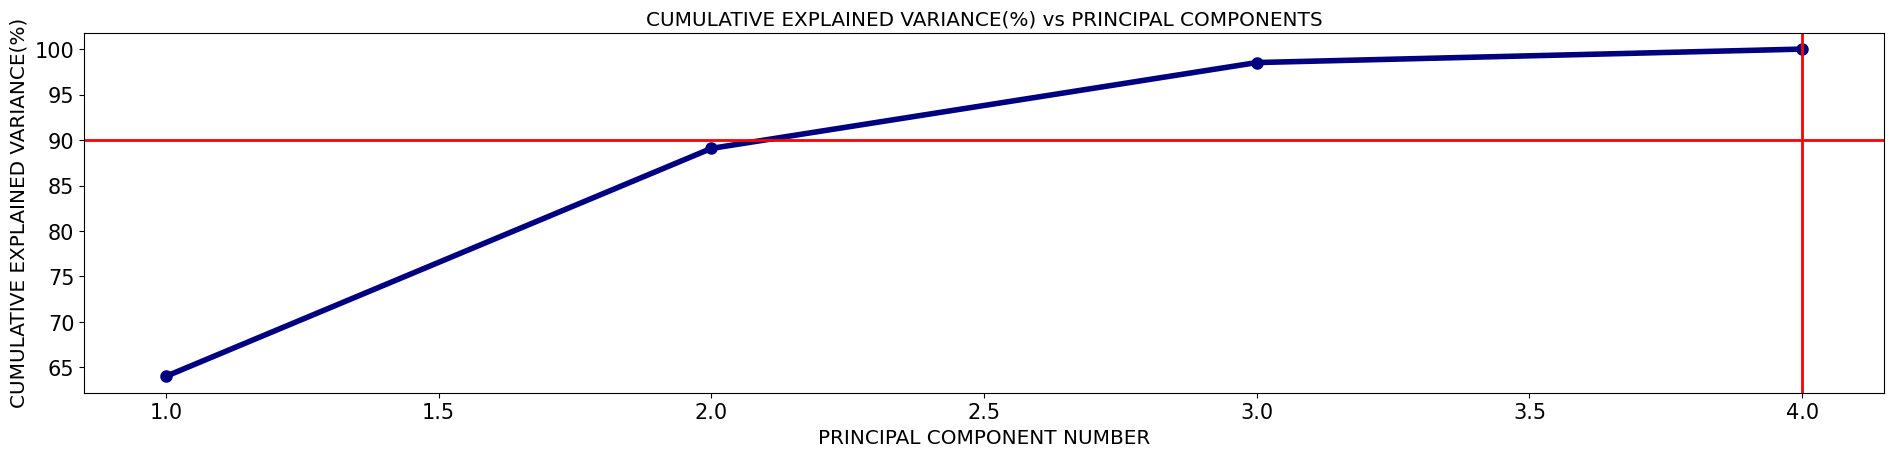

In [9]:
fig = plt.figure(figsize=(20,4))

axes = fig.add_axes([0.1,0.1,0.9,0.9])
axes.tick_params(axis='x', labelsize= 15 )
axes.tick_params(axis='y', labelsize= 15 )
axes.set_title('CUMULATIVE EXPLAINED VARIANCE(%) vs PRINCIPAL COMPONENTS',fontsize='x-large')
axes.set_ylabel('CUMULATIVE EXPLAINED VARIANCE(%)',fontsize='x-large')
axes.set_xlabel('PRINCIPAL COMPONENT NUMBER',fontsize='x-large')
axes.plot(x_index,np.cumsum(model.explained_variance_ratio_)*100,color='navy',lw =4, ls='-', marker='o', markersize='8')
plt.axhline(90,color='r',lw = 2)
plt.axvline(4,color='r',lw = 2)
plt.show();

In [10]:
principalComponents = model.fit_transform(X)
principalComponents

array([[ 7.11660344e-01, -2.12345451e-01, -8.81159972e-01,
         1.11475810e-01],
       [ 1.19389291e+00,  1.23345112e-01, -2.32805065e-01,
         2.24827092e-01],
       [ 1.02818761e-01,  2.16991932e+00, -6.47338161e-01,
         2.86657698e-01],
       [ 1.02971975e+00, -1.16029118e+00,  3.74464087e-01,
         3.02759925e-01],
       [-2.79763905e+00,  1.24752427e-01,  2.32180327e-01,
        -2.00211285e-01],
       [-2.82875949e+00,  1.05923946e-01, -8.88701882e-02,
        -8.15473390e-02],
       [ 1.29829683e+00,  1.71825613e-01,  2.69834384e-01,
        -2.81822934e-01],
       [ 3.41216086e-01,  4.23936168e-01,  6.42851998e-01,
        -3.54719367e-01],
       [ 2.07665753e+00, -1.92800642e+00, -5.45714542e-01,
         3.92167137e-01],
       [-2.32399223e+00,  3.55509402e-01,  1.52382714e-01,
         8.53244932e-02],
       [ 8.58744446e-01, -1.50857316e+00, -2.45442092e-01,
         3.60246448e-01],
       [ 1.39672306e+00, -4.72150946e-01, -6.81007622e-01,
      

In [11]:
pd.DataFrame(principalComponents).to_csv('PCAfactors.csv') 